# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Для начала отроем файл с данными и изучим общую информацию. 

#### Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### Прочитаем файл и сохраним его в переменной data

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

#### посмотрим общую информацию о файле

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

После вывода информации о датасете обнаружены пропуски в давольно значительном количестве столбцов, однако не везде эти пропуски означают отсутствие данных. Так, например в столбцах is_apartment, balcony, parks_around3000 и ponds_around3000 могут означать отсутствие балкона в квартире, водоёмов или парков в радиусе 3 км.

In [4]:
pd.set_option('display.max_columns', None)
# так будут отображаться все колонки, без ограничений

In [5]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


'Общая гистограмма таблицы'

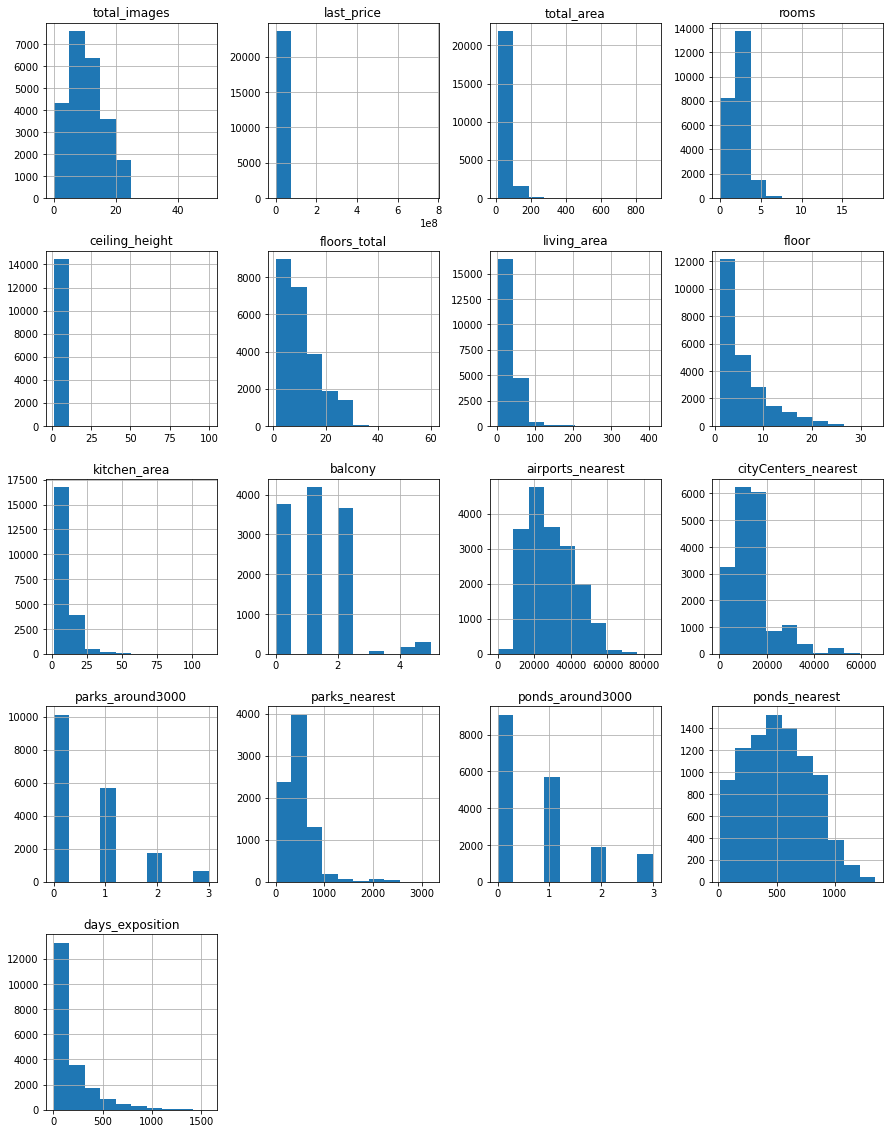

In [6]:
data.hist(figsize=(15, 20))
"Общая гистограмма таблицы"

In [7]:
data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104473,0.115352,0.099288,-0.001987,0.010427,0.104780,0.031340,-0.029303,-0.024407,0.104756,0.121693,-0.002298,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657
last_price,0.104473,1.000000,0.653675,0.363343,0.085430,-0.006984,0.566492,0.026576,-0.025362,-0.008802,0.519869,0.029646,-0.026239,-0.206747,0.151058,-0.016414,0.159996,-0.084809,0.081146
total_area,0.115352,0.653675,1.000000,0.758344,0.095490,-0.075774,0.939537,-0.024754,-0.072653,-0.034885,0.609121,0.047937,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.099288,0.363343,0.758344,1.000000,0.054457,-0.228215,0.845977,-0.150862,-0.147286,-0.087500,0.269945,0.017991,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961
ceiling_height,-0.001987,0.085430,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,0.001674,0.042777,0.087641,0.040523,-0.023947,-0.091689,0.065915,-0.019167,0.078209,-0.059090,0.019091
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.028732,1.000000,-0.169311,0.678059,0.070151,0.050791,0.163944,0.194065,0.108288,0.019774,-0.252833,0.097527,-0.122735,0.038864,-0.052234
living_area,0.104780,0.566492,0.939537,0.845977,0.090650,-0.169311,1.000000,-0.097210,-0.056231,-0.033711,0.428674,0.018849,-0.057912,-0.231368,0.184453,-0.050167,0.148933,-0.081674,0.142454
floor,0.031340,0.026576,-0.024754,-0.150862,-0.011798,0.678059,-0.097210,1.000000,0.036940,0.035824,0.135531,0.168773,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.001674,0.070151,-0.056231,0.036940,1.000000,-0.004235,NaN,0.031455,-0.021876,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476
open_plan,-0.024407,-0.008802,-0.034885,-0.087500,0.042777,0.050791,-0.033711,0.035824,-0.004235,1.000000,NaN,0.019491,-0.013583,-0.004204,-0.010077,0.010612,0.008455,-0.003328,-0.024112


In [8]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Здесь можно обнаружить интересные данные, есть невероятно большая квартира на 900 квдратных метров, а ещё у кого-то 100 метровый потолок.

### Предобработка данных

#### Начнём переработку со столбца is_apartment.

In [9]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

В стобце булев тип данных, значит пропущенные значения так же должны равнятся False 

In [10]:
data[data['is_apartment'] == True]['is_apartment'].count()

50

In [11]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].unique()

array([False,  True])

#### К сожалению название населённого пункта можно было бы заменить исходя из расстояний, однако так не получиться назвать населённый пункт со 100% вероятностью и пропусков не так много, поэтому лучше от них избавиться. 

In [12]:
data = data.dropna(subset=['locality_name'])

#### Пропуски в столбцах balcony, parks_around3000 и ponds_around3000 вероятнее означают их отстуствие, поменяем эти пропуски на 0.

In [13]:
data['balcony'] = data['balcony'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

Данные изменены, однако в строчке выше при первом выполнении кода пявилась ошибка, к сожалению не могу сказать с чем именно она была связана, однако при последовательном выполнении ошибок не было. 

#### Необходмио заполнить пропуски в жилой площади, лучше всего это сделать по средней зависимости жилой площади от площади квартиры. Замена на площадь в зависимости от комнат здесь не совсем подойдёт т.к. площадь квартиры с одинаковым количеством комнат может очень сильно отличаться. Ниже проверяются зависимости жилой площади от общей площади квартиры и комнат, а так же представлен средний показатель, который как мне кажется и будет наиболее применим.

In [14]:
living_area = data.pivot_table(values=['living_area','total_area'] , index='rooms', aggfunc='median')
living_area['add'] = living_area['living_area'] / living_area['total_area']
living_area['add'].mean()

0.6309096147319261

In [15]:
data['living_area'] = data['living_area'].fillna(data['total_area']*living_area['add'].mean())

#### Прокупуски в площади кухни могут быть связаны с квартирами студями и апартаментами, это нужно проверить

In [16]:
data[data['is_apartment'] == True]['is_apartment'].count() + data[data['studio'] == True]['studio'].count()

199

Таких всего 199, однако пропусков более 2000 и как видно ниже, данные о кухне там есть.

In [17]:
data[data['is_apartment'] == True].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
543,11,12790000.0,56.6,2018-11-06T00:00:00,2,3.50,3.0,29.400000,1,True,False,False,NaN,0.0,Петергоф,35248.0,30437.0,3.0,53.0,3.0,22.0,NaN
916,11,8183000.0,70.0,2018-01-11T00:00:00,2,3.12,3.0,40.000000,3,True,False,False,NaN,2.0,Санкт-Петербург,45796.0,21729.0,0.0,NaN,1.0,754.0,179.0
1109,1,34878556.0,95.8,2014-12-09T00:00:00,2,NaN,6.0,58.300000,5,True,False,False,20.00,1.0,Санкт-Петербург,21860.0,318.0,2.0,160.0,3.0,569.0,1572.0
1608,12,2150000.0,20.1,2019-01-30T00:00:00,1,NaN,9.0,12.681283,1,True,False,False,NaN,0.0,Санкт-Петербург,26646.0,12147.0,0.0,NaN,0.0,NaN,13.0
2759,11,7500000.0,152.0,2018-07-27T00:00:00,3,3.00,3.0,95.898261,1,True,False,False,NaN,1.0,Всеволожск,NaN,NaN,0.0,NaN,0.0,NaN,7.0
2975,9,4931398.0,42.9,2018-07-23T00:00:00,1,3.15,4.0,20.390000,3,True,False,False,10.29,0.0,Санкт-Петербург,44870.0,20802.0,0.0,NaN,1.0,792.0,273.0
3067,13,6600000.0,95.0,2018-09-08T00:00:00,2,4.50,7.0,45.000000,7,True,False,False,25.00,2.0,Выборг,NaN,NaN,0.0,NaN,0.0,NaN,96.0
3816,4,4779000.0,53.1,2016-05-16T00:00:00,1,NaN,13.0,19.800000,6,True,False,False,15.90,2.0,Санкт-Петербург,19396.0,4516.0,0.0,NaN,1.0,826.0,60.0
3951,10,4300000.0,50.0,2019-04-20T00:00:00,1,3.00,11.0,17.000000,9,True,False,False,12.00,2.0,Санкт-Петербург,10143.0,11367.0,0.0,NaN,0.0,NaN,NaN
4339,19,6900000.0,72.0,2019-03-25T00:00:00,3,3.50,4.0,70.000000,1,True,False,False,NaN,0.0,Санкт-Петербург,31487.0,4466.0,2.0,353.0,1.0,439.0,22.0


#### Значит пропуски в площади кухни так же нужно заполнить, и сделаем это так же, как с жилой площадью. Однако есть квартиры, где количество комнат указано 0 и в них вероятнее всего нет отдельной кухни, поэтому в таких корректнее будет указать 0.

In [18]:
kitchen_area = data.pivot_table(values=['kitchen_area','total_area'] , index='rooms', aggfunc='median')
kitchen_area['add'] = kitchen_area['kitchen_area'] / kitchen_area['total_area']
kitchen_area['add'].mean()

0.10843517606330211

In [19]:
data['kitchen_area'] = data['kitchen_area'].fillna(data[data['rooms']!=0]['total_area'] * kitchen_area['add'].mean())
data['kitchen_area'] = data['kitchen_area'].fillna(data[data['rooms']==0]['total_area'] * 0)

#### Теперь займёмся высотой потолков.

<AxesSubplot:>

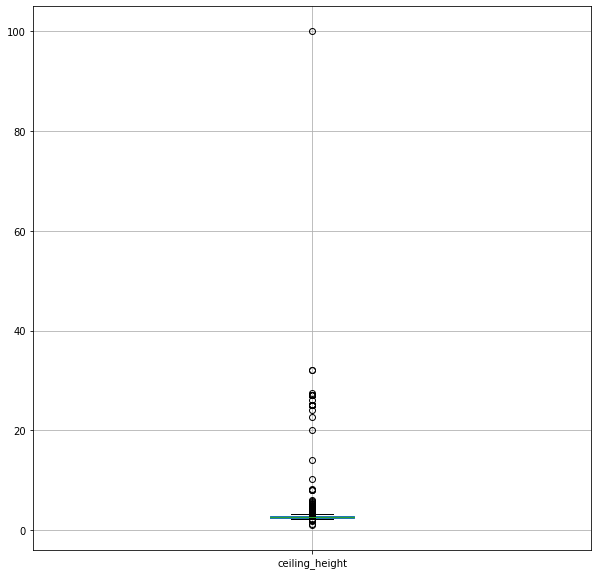

In [20]:
data.boxplot(column='ceiling_height', figsize=(10, 10))

По графику выдны давольно сильные выбросы, это нужно исправлять. Видно, что есть потолки и около 1 метра в высоту и очень высокие, в районе от 5 до 10 метров. Как первое, так и второе кажется не очень реалистичным. Высота от 20 до 40 метров обусловлена скорее всего ошибкой в данных и реальная величина в 10 раз меньше. Для начала избавимся от пропусков, врядли эти выбросы смогут повлиять на медианое значение, поэтому заменить пропуски предлагаю именно медианой. Так же судя по таблице корреляции высота потолков не зависит от каких либо параметров. А ещё медиана как раз совпадает со средним показателем высоты потолков.

In [21]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

#### Высоту менее 2 метров и 100 метров предлагаю исключить, поскольку такая высота не реалистична и её нельзя как либо логично скорректировать.

In [22]:
data = data.query('ceiling_height > 2')
data = data.query('ceiling_height < 100')

In [23]:
data.loc[data['ceiling_height'] > 20, 'ceiling_height'] /= 10

Высота более 20 метров скорректирована, однако остались высоты более 5 метров) По найденной информации такая высота потолков существует, однако квартир таких должно быть очень мало, лучше на них взглянуть.

In [24]:
data[data['ceiling_height'] > 5]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
464,15,66571000.0,280.3,2015-06-11T00:00:00,6,5.2,8.0,159.500000,7,False,False,False,21.100000,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
1026,20,155000000.0,310.0,2018-10-12T00:00:00,5,5.3,3.0,190.000000,3,False,False,False,63.000000,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
1388,20,59800000.0,399.0,2015-01-21T00:00:00,5,5.6,6.0,251.732936,6,False,False,False,43.265635,0.0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0
3474,3,1400000.0,30.0,2018-03-16T00:00:00,1,8.0,5.0,15.300000,2,False,False,False,7.300000,0.0,деревня Нурма,NaN,NaN,0.0,NaN,0.0,NaN,125.0
5863,20,5650000.0,45.0,2018-08-15T00:00:00,1,8.3,16.0,19.300000,14,False,False,False,8.300000,1.0,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0
7578,17,38000000.0,143.0,2017-11-02T00:00:00,3,5.5,5.0,83.000000,5,False,False,False,29.000000,1.0,Санкт-Петербург,26333.0,6448.0,3.0,479.0,0.0,NaN,NaN
12628,14,3900000.0,50.0,2018-03-29T00:00:00,1,5.3,5.0,31.545481,5,False,False,False,5.421759,0.0,Санкт-Петербург,19644.0,3918.0,1.0,505.0,1.0,92.0,8.0
15061,19,5600000.0,56.4,2018-05-11T00:00:00,2,14.0,14.0,32.400000,5,False,False,False,9.100000,2.0,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0
15743,14,5600000.0,67.0,2016-11-11T00:00:00,3,8.0,16.0,41.000000,1,False,False,False,8.000000,0.0,Санкт-Петербург,32691.0,11035.0,1.0,723.0,0.0,NaN,474.0
17442,0,5350000.0,54.0,2015-06-16T00:00:00,2,8.0,5.0,29.000000,2,False,False,False,5.855500,1.0,Красное Село,24638.0,28062.0,0.0,NaN,0.0,NaN,469.0


Действительно такая высота может быть логична в больших квартирах, однако потолки выше 10 метров лучше всё же удалить.

In [25]:
data = data.query('ceiling_height < 10')

#### Далее можно удалить данные, где не указано количество этажей в доме, поскольку таких строк очень мало и вряд ли они повлияют на остальные расчёты

In [26]:
data = data.dropna(subset=['floors_total'])

#### Пропуски остались только в столбцах с данными о расстоянии до какого-либо объекта, а так же в информации о времени продажи квартиры. Их нужно проверить. Возможно данные о расстоянии до парка и водоёма указаны только там, где они есть рядом.

In [27]:
data[data['parks_around3000'] != 0]['parks_around3000'].count()

8020

<AxesSubplot:>

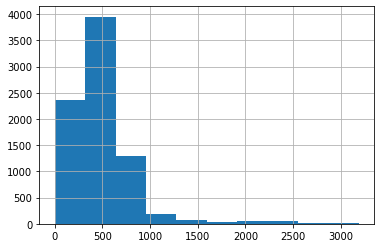

In [28]:
data['parks_nearest'].hist()
# гистограмма расстояния до ближайшего парка

In [29]:
data[data['ponds_around3000'] != 0]['ponds_around3000'].count()

9030

<AxesSubplot:>

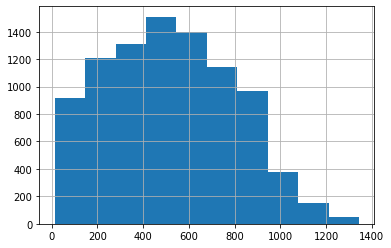

In [30]:
data['ponds_nearest'].hist()
# гистограмма расстояния до ближайшего водоёма

Так оно и есть, данные указаны только там, где в пределах 3 км есть парки или водоёмы. В таком случае лучше оставить пропущенные значения, поскольку их достаточно много. А расчёт зависимости проводить только от заполненных значений.

#### Теперь проверим столбец days_exposition

<AxesSubplot:>

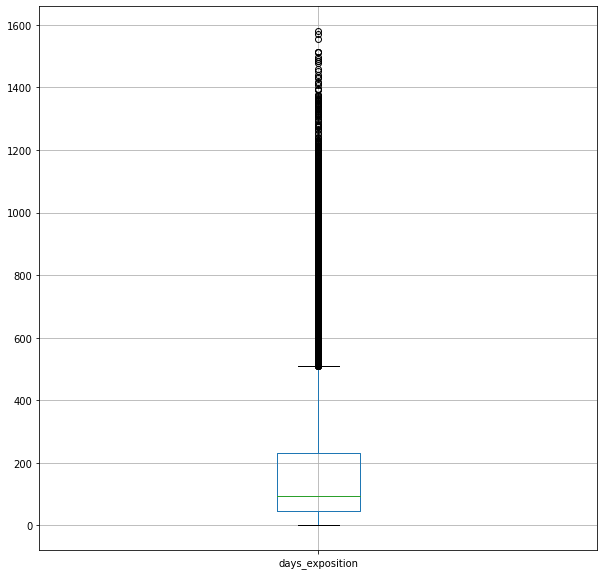

In [31]:
data.boxplot(column='days_exposition', figsize=(10, 10))

<AxesSubplot:>

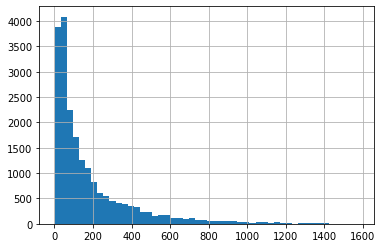

In [32]:
data['days_exposition'].hist(bins=50)

В данных о времени продажи квартиры есть около 3 тысяч пропусков и некоторые квартиры продаются более 4 лет. Нужно проверить сколько таких.

In [33]:
data[data['days_exposition'] > 1460]['days_exposition'].count()

11

Таких квартир не столь много, а продажа этих квартир могла затянуться по очень разным причинам, от слишком завышенной цены до нежелания продавать владельцев квартиру. Пропущеные значения означают, что скорее всего квартира и вовсе не была продана по итогу, эти данные тоже не целесообразно учитывать, поскольку рынок их пока что не оценил, и эти объявления ещё могут поменяться.
Лучше всего от этих данных избавиться.

In [34]:
data = data.query('days_exposition <= 1460')

Ещё есть квартиры, которые продавались очень быстро, посмотрим что с ними.

<AxesSubplot:>

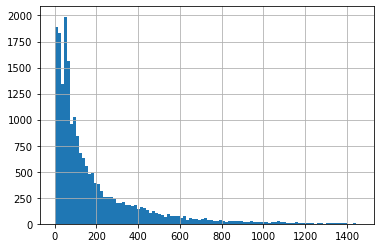

In [35]:
data['days_exposition'].hist(bins=100)

#### Далее проверим уникальные значения названий населённых пунктов и исправим неявные дубликаты.

In [36]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Никольское', 'Новая Ладога',
       'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво', 'Подпорожье',
       'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург', 'Светогорск',
       'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор', 'Сясьстрой',
       'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
       'городской посёлок Фёдоровское', 'городской посёлок Янино-1',
     

Достаточно много дубликатов, связанные в основном с названием посёлков, однако это поправимо) 

In [37]:
def non_dup (locality_name):
    if 'поселок городского типа' in locality_name:
        return locality_name.replace('поселок городского типа', 'поселок')
    elif 'городской поселок' in locality_name:
        return locality_name.replace('городской поселок', 'поселок')
    elif 'коттеджный поселок' in locality_name:
        return locality_name.replace('коттеджный поселок', 'поселок')
    elif 'посё' in locality_name:
        return locality_name.replace('посё', 'посе')
    else:
        return locality_name

In [38]:
data['locality_name'] = data['locality_name'].apply(non_dup)

In [39]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Никольское', 'Новая Ладога',
       'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво', 'Подпорожье',
       'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург', 'Светогорск',
       'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор', 'Сясьстрой',
       'Тихвин', 'Тосно', 'Шлиссельбург', 'городской поселок Будогощь',
       'городской поселок Виллози', 'городской поселок Мга',
       'городской поселок Назия', 'городской поселок Новоселье',
       'городской поселок Павлово', 'городской поселок Рощино',
       'городской поселок Свирьстрой', 'городской поселок Фёдоровское',
       'городской поселок Янино-1', 'деревня Агалатово', 'деревня Аро',
       'деревня Батово', 'деревня Бегуни

Все неявные дубликаты заменены, при этом названия самих населённых пунтктов сохранились.

#### Далее поменяем тип данных в столбце first_day_exposition на datetime, а так же balcony и last_price на целые цисла.

In [40]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y %m %dT%H:%M:%S')

In [41]:
data['balcony'] = data['balcony'].astype('int')

In [42]:
data['last_price'] = data['last_price'].astype('int')

#### Проверим данные после переработки.

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20369 entries, 1 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20369 non-null  int64         
 1   last_price            20369 non-null  int64         
 2   total_area            20369 non-null  float64       
 3   first_day_exposition  20369 non-null  datetime64[ns]
 4   rooms                 20369 non-null  int64         
 5   ceiling_height        20369 non-null  float64       
 6   floors_total          20369 non-null  float64       
 7   living_area           20369 non-null  float64       
 8   floor                 20369 non-null  int64         
 9   is_apartment          20369 non-null  bool          
 10  studio                20369 non-null  bool          
 11  open_plan             20369 non-null  bool          
 12  kitchen_area          20369 non-null  float64       
 13  balcony         

Пропуски остались только в столбцах parks_nearest и ponds_nearest, они связаны с отсутствием этих объектов в пределах 3 км. Так же пропуски есть в столбцах airports_nearest и airports_nearest, вероятнее всего в этих столбцах заполнены данные только в крупных городах или только в Санкт-Питербурге. К тому же данные в этих столбцах необходимы только для расчёта в Санкт-Питербурге, а пропусков достаточно много, поэтому удалять их нецелесообразно, а как либо заполнить невозможно.

#### Теперь проверим аномалии в стоимости квартир.

In [44]:
data['last_price'].max()

763000000

In [45]:
data['last_price'].min()

12190

<AxesSubplot:>

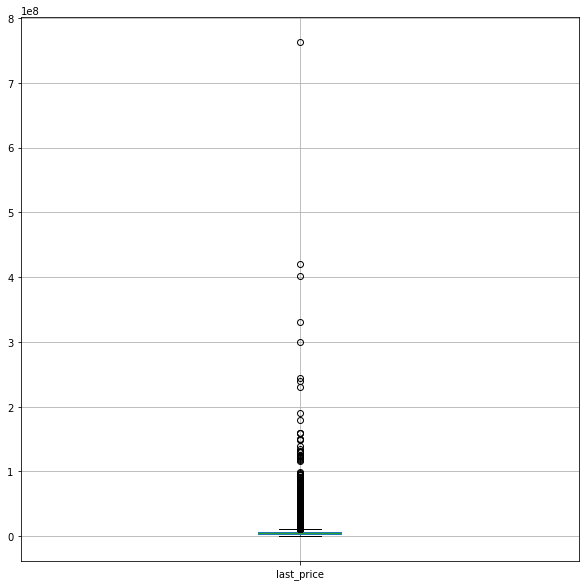

In [46]:
data.boxplot(column='last_price', figsize=(10, 10))

In [47]:
data[data['last_price'] > 300000000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1436,19,330000000,190.0,2018-04-04,3,3.50,7.0,95.0,5,False,False,False,40.00000,0,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0
12971,19,763000000,400.0,2017-09-30,7,2.65,10.0,250.0,10,False,False,False,43.37407,2,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0
14706,15,401300000,401.0,2016-02-20,5,2.65,9.0,204.0,9,False,False,False,24.00000,3,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0
19540,8,420000000,900.0,2017-12-06,12,2.80,25.0,409.7,25,False,False,False,112.00000,0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0


In [48]:
data[data['last_price'] < 100000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190,109.0,2019-03-20,2,2.75,25.0,32.0,25,False,False,False,40.5,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0


Есть две квартиры с нереалистичными значениями, при этом обе в СПБ) за 36000 и 763 млн рублей, именно от них предлагаю избавиться. Поскольку, есть объявления со стоимостью в 250 млн рублей, и это первый этаж.

In [49]:
data = data.query('last_price < 700000000')
data = data.query('last_price > 100000')

#### Проверим аномалии в площади квартир

<AxesSubplot:>

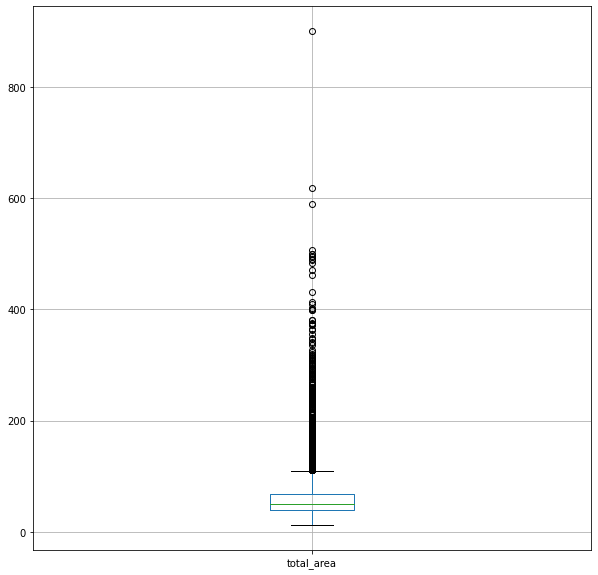

In [50]:
data.boxplot(column='total_area', figsize=(10, 10))

In [51]:
data['total_area'].min()

12.0

В интернете есть информация о столь маленьких квартирах на 12 метров, а вот квартиру на 850 квадратных метров в СПБ найти мне не удалось, лучше будет избавить от неё.

In [52]:
data = data.query('total_area < 800')

#### Проверим то же самое в количестве комнат

<AxesSubplot:>

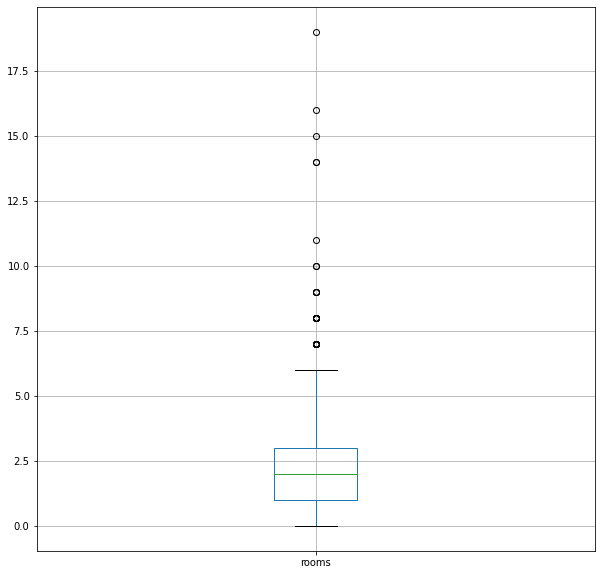

In [53]:
data.boxplot(column='rooms', figsize=(10, 10))

Есть несколько выбивающихся значений, предлагаю взгянуть на них.

In [54]:
data.query('rooms > 13')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
866,5,25000000,363.0,2017-12-23,14,3.16,5.0,222.0,4,False,False,False,16.6,0,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0
5358,20,65000000,590.0,2019-02-14,15,3.50,6.0,409.0,3,False,False,False,100.0,0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
14498,6,32250000,374.6,2018-06-09,19,2.65,5.0,264.5,2,False,False,False,27.6,0,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0
18848,6,28500000,270.0,2015-03-02,16,3.00,4.0,180.0,4,False,False,False,13.0,1,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365.0
20829,6,28659000,245.4,2016-03-31,14,2.65,4.0,168.3,2,False,False,False,25.9,0,Санкт-Петербург,21104.0,2054.0,3.0,541.0,2.0,118.0,95.0


В целом эти квартиры кажутся вполне реальными, в СПБ существуют квартиры и на 80 комнат, да и средняя площадь жилых комнат у этих квартир более 11 квадратных метров, мне кажется, что их лучше оставить.

### Расчёт и добавление в таблицу новых столбцов

#### Расчитаем стоимость одного квадратного метра для каждой квартиры и добаваим её в новый столбец sq_m_price.

In [55]:
data['sq_m_price'] = data['last_price'] / data['total_area']

#### Далее получим день недели публикации объявления и добавим в новый столбей week_day

In [56]:
data['weekday'] = data['first_day_exposition'].dt.weekday

#### Так же добавим столбцы month и year с номером месяца и года соответственно.

In [57]:
data['month'] = data['first_day_exposition'].dt.month

In [58]:
data['year'] = data['first_day_exposition'].dt.year

#### Далее добавим в данные тип этажа квартиры.

In [59]:
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_type, axis = 1)

#### Осталось лишь добавить расстояние до центра города в километрах и проверить полученные значения.

In [60]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].round()
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_m_price,weekday,month,year,floor_type,cityCenters_nearest_km
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.600000,1,False,False,False,11.000000,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,100.314629,9,False,False,False,17.241193,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0
5,10,2890000,30.4,2018-09-10,1,2.65,12.0,14.400000,5,False,False,False,9.100000,0,городской поселок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0,95065.789474,0,9,2018,другой,NaN


Все необходимые данные добавлены в таблицу, можно переходить к исследованию.

### Проведём исследовательский анализ данных

#### Изучим различные данные по таблице. И начнём с общей площади.

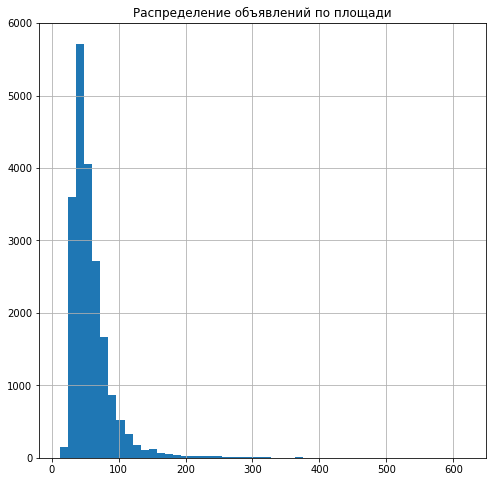

In [61]:
data['total_area'].hist(bins=50, figsize=(8, 8)).set_title('Распределение объявлений по площади')
plt.show()

Судя по гистограмме больше всего продаётся квартир с площадью около 50 - 80 квадратных метров, а квартир с площадью более 200 и, тем более 400 метров встречается совсем мало, однако есть и такие.

##### Далее изучим жилую площадь и площадь кухни.

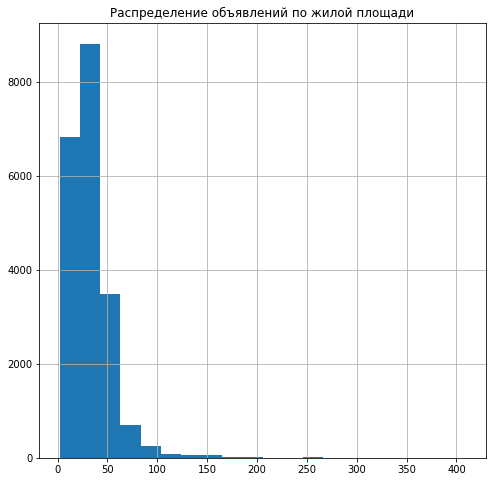

In [62]:
data['living_area'].hist(bins=20, figsize=(8, 8)).set_title('Распределение объявлений по жилой площади')
plt.show()

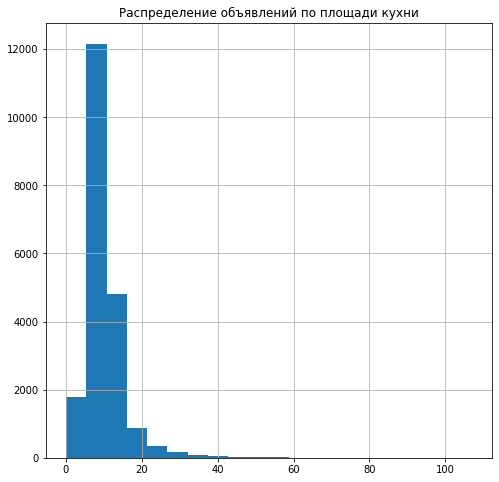

In [63]:
data['kitchen_area'].hist(bins=20, figsize=(8, 8)).set_title('Распределение объявлений по площади кухни')
plt.show()

Тут всё приблизительно так же, как и с общей площадью квартиру, только чуть меньшие показателию. В среднем жилая площадь состовляет приблизительно 30 - 40 квадратных метров, а площадь кухни около 10 метров.

##### Изучим распределение цен в объявлениях

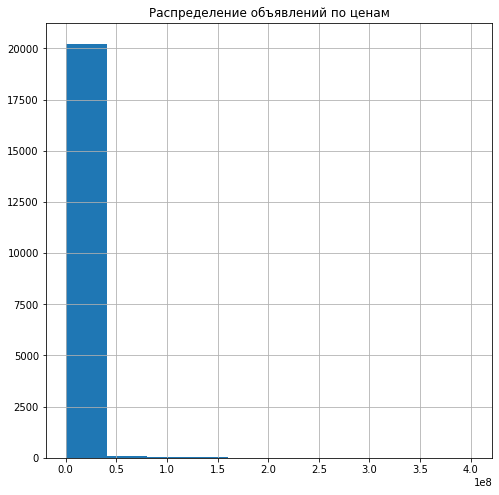

In [64]:
data['last_price'].hist(bins=10, figsize=(8, 8)).set_title('Распределение объявлений по ценам')
plt.show()

Большинство объявлений, предстаавленных в данных, со стоимостю до 50 млн рублей, однако есть и объявления около 100 млн рублей, а с большей стоимостью объявлений совсем мало, однако они всё таки есть.

##### Изучим количество комнат в квартирах, высоту потолков и этажи.

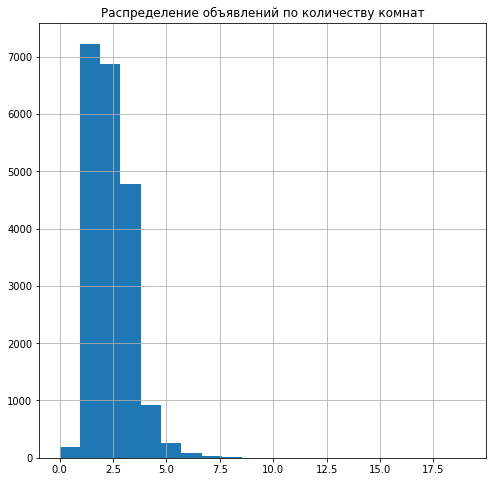

In [65]:
data['rooms'].hist(bins=20, figsize=(8, 8)).set_title('Распределение объявлений по количеству комнат')
plt.show()

Больше всего продаётся квартир от 1 до 3 комнат, остальных уже не так много, ведь такие квартиры достаточно редко встречаются.

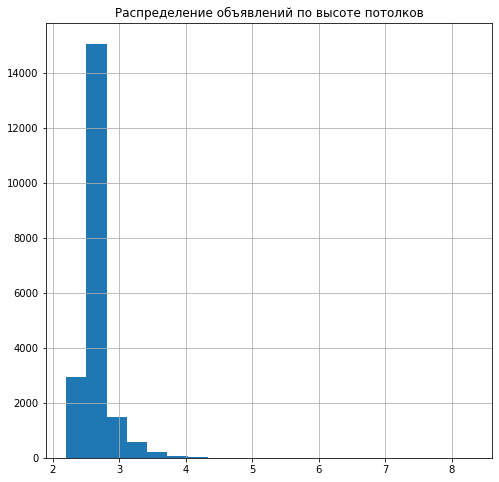

In [66]:
data['ceiling_height'].hist(bins=20, figsize=(8, 8)).set_title('Распределение объявлений по высоте потолков')
plt.show()

С потолками так же ожидаемо, большинство от 2.4 до 2.7 метров в высоту, чем выше потолки, тем реже они встречаются)

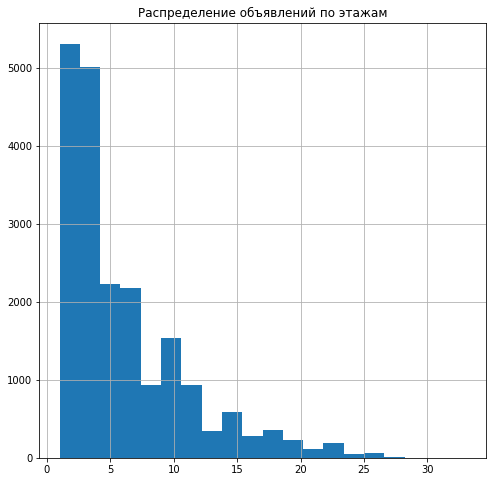

In [67]:
data['floor'].hist(bins=20, figsize=(8, 8)).set_title('Распределение объявлений по этажам')
plt.show()

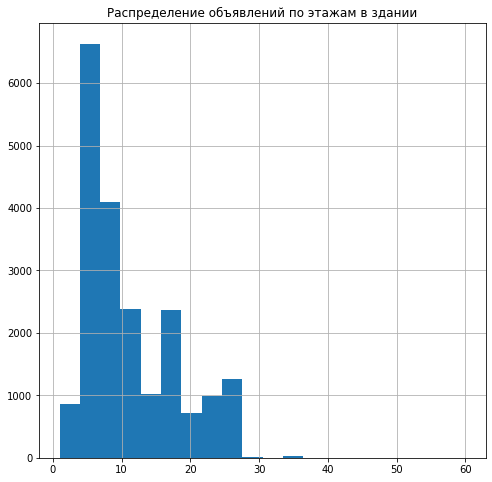

In [68]:
data['floors_total'].hist(bins=20, figsize=(8, 8)).set_title('Распределение объявлений по этажам в здании')
plt.show()

То же самое можно сказать и про этаж квартиры, чем он выше, тем реже встречается, да и зданий, где есть 5 этаж больше чем зданий, где есть 25 этаж.

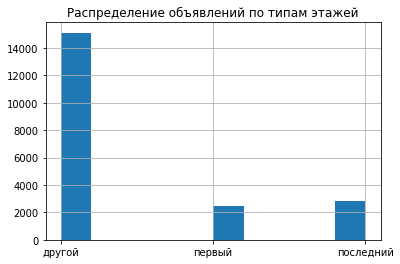

In [69]:
data['floor_type'].sort_values().hist().set_title('Распределение объявлений по типам этажей')
plt.show()

По распределению этажей так же ожидаемый результат, 'другой' встречается намного чаще чем первый или последний.

##### Изучим рсстояние до различных мест.

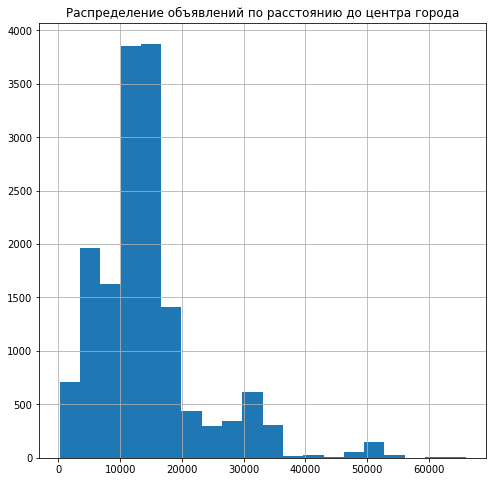

In [70]:
data['cityCenters_nearest'].hist(bins=20, figsize=(8, 8)).set_title('Распределение объявлений по расстоянию до центра города')
plt.show()

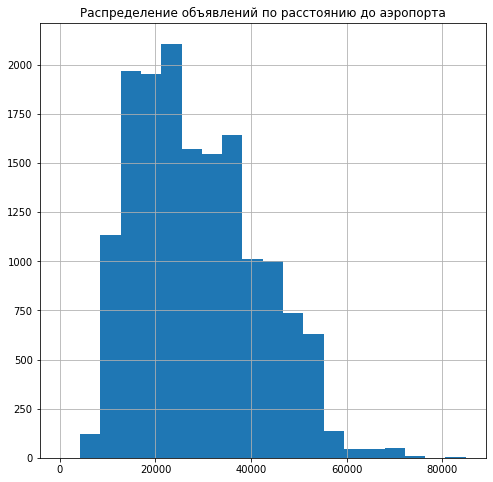

In [71]:
data['airports_nearest'].hist(bins=20, figsize=(8, 8)).set_title('Распределение объявлений по расстоянию до аэропорта')
plt.show()

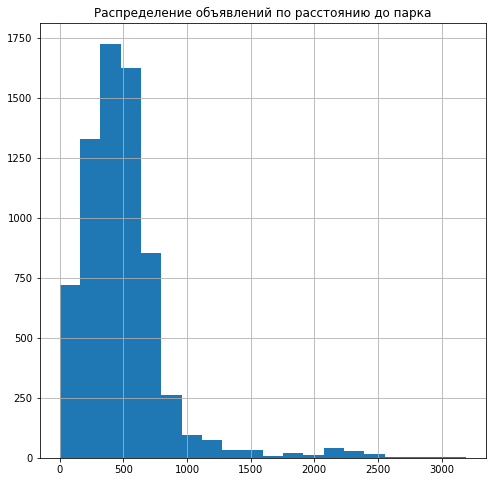

In [72]:
data['parks_nearest'].hist(bins=20, figsize=(8, 8)).set_title('Распределение объявлений по расстоянию до парка')
plt.show()

Как можно увидить по графикам, больше всего квартир продаётся в 10 километрах от центра города, 20 километрах от аэропорта и 500 метрах от ближайшего парка, а с увеличением и уменьшением расстояния количество объявлений уменьшается. Это неудивительно, ведь ближе к центру квартир всегда меньше, как и рядом с аэропортами. А вот парков если и есть рядом, распологаются достаточно близко.

##### Теперь можем взгянуть на гистограмму дней недели и месяца публикации объявления.

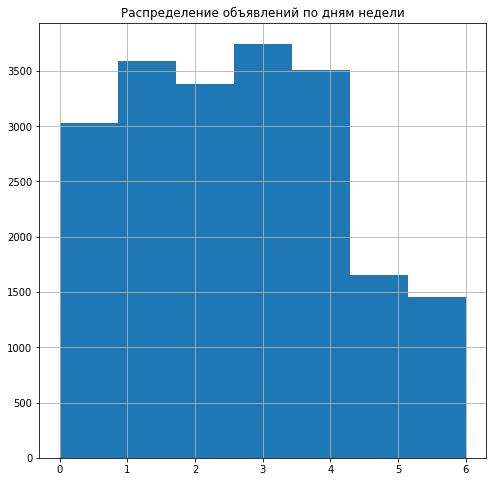

In [73]:
data['weekday'].hist(bins=7, figsize=(8, 8)).set_title('Распределение объявлений по дням недели')
plt.show()

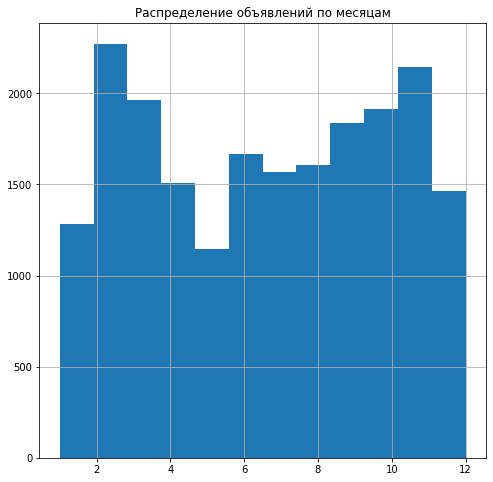

In [74]:
data['month'].hist(bins=12, figsize=(8, 8)).set_title('Распределение объявлений по месяцам')
plt.show()

Судя по ней в выходные публикуется меньше объявлений, чем на недели. А вот больше всего объявлений публикуется в четверг. А судя по графику месяцев публикации болше всего объявлений публикуется в феврале и в ноябре, а в январе и мае меньше всего, вероятнее всего это из-за праздников, новогодних и майских, большинство людей хочет отдохнуть, а не продавать квартиры.

#### Теперь изучим насколько быстро (или не очень) продавались квартиры. Построим гистограму, найдём среднее и медианое значения.

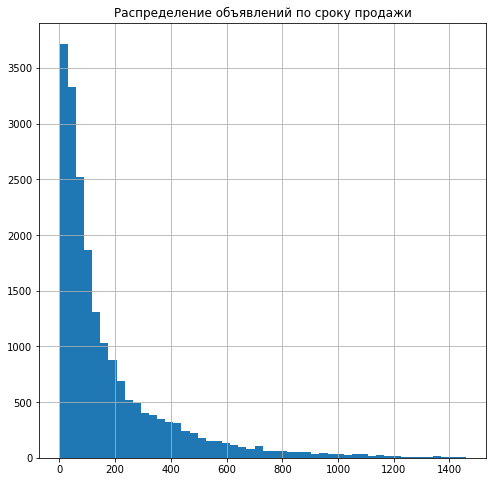

In [75]:
data['days_exposition'].hist(bins=50, figsize=(8, 8)).set_title('Распределение объявлений по сроку продажи')
plt.show()

In [76]:
data['days_exposition'].mean()
#среднее значение

180.08263772954925

In [77]:
data['days_exposition'].median()
#медианое значение

95.0

Как можно увидеть по графику, это же подтверждает и медианное значение, большинство квартир продаются в течении 100 дней с момента публикации объявления, а далее ожидаемое снижение, однако, поскольку далее значения доходят до 1500 дней, они влияют на среднее значение, увиличивая его практически в 2 раза по сравнению с медианой. Хотя длительность продажи квартир может зависить как от человеческого фактора, так и от её премиальности и стоимости, ведь дорогие квартиры, вероятнее всего должны продаваться дольше. Нужно проверить, влияет ли стоимость квартиры на длительность её продажи.

In [78]:
data['days_exposition'].corr(data['last_price'])
#корреляция цены и времени продажи

0.09987230771169715

<AxesSubplot:xlabel='last_price', ylabel='days_exposition'>

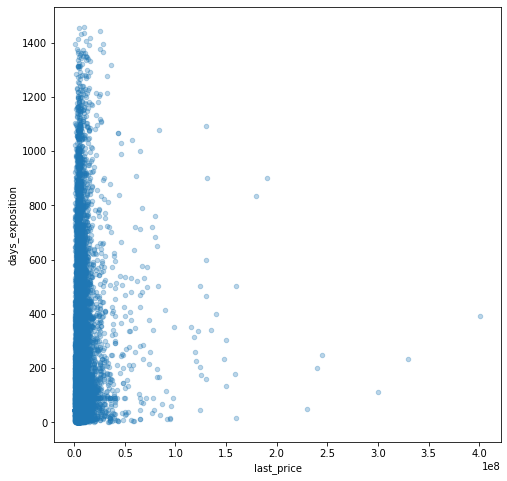

In [79]:
data.plot(x='last_price', y='days_exposition', kind='scatter', alpha=0.3, figsize=(8, 8))
#диаграмма рессеяния

Как можно заметить по графику и кореляции цена практически не влияет на срок продажи, а самая дорогая квартира вообще была продана достаточно быстро. Проверим ещё несколько кореляций, вдруг удастся распознать, что влияет на срок продажи квартиры.

In [80]:
data['days_exposition'].corr(data['year'])
#корреляция срока продажи от года продажи квартиры

-0.6100414268755304

In [81]:
data['days_exposition'].corr(data['total_area'])
#корреляция срока продажи от общей площади квартиры

0.15230408552910638

In [82]:
data['days_exposition'].corr(data['floor'])
#корреляция срока продажи от этажа квартиры

-0.037793717160040964

In [83]:
data['days_exposition'].corr(data['cityCenters_nearest_km'])
#корреляция срока продажи от расстояния до центра города

-0.06043486940533283

Самая большая зависимость срока продажи от года, построим диаграмму рассеяния, чтобы посмотреть более подробно.

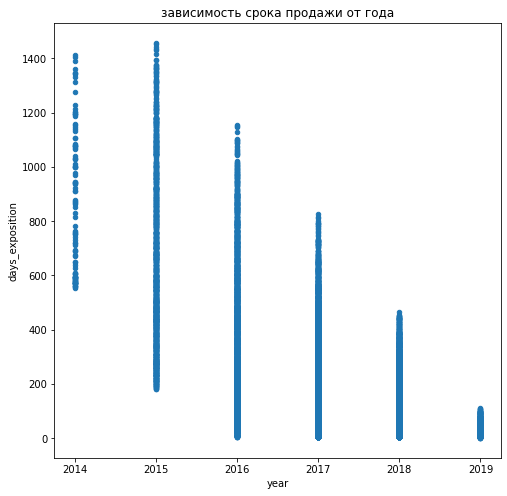

In [84]:
data.plot(x='year', y='days_exposition', kind='scatter', alpha=1, figsize=(8, 8), title='зависимость срока продажи от года')
plt.show()

Судя по графику в 2019 году квартиры продавались быстрее всего, а вот в 2014 медленне, начиная с 500 дней на продажу и с каждым годом время на продажу квартиры уходило всё меньше и меньше. На 2019 год конечно могли повлиять удалённые данные, однако их не так много, чтобы повлиять на остальные года. Может быть с годами квартиры становиться продавать всё проще и проще, а может к продаже квартир изменилось отношение людей. А может быть и то и другое вместе взятые.

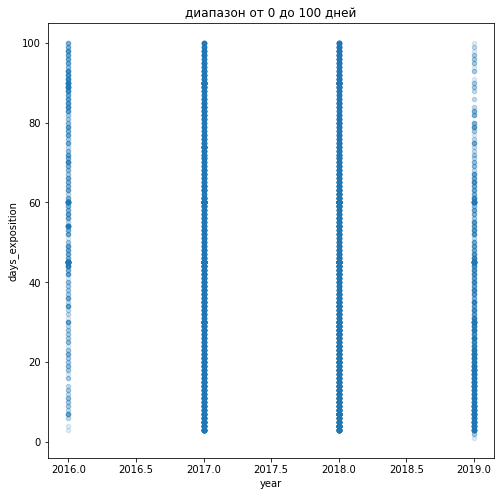

In [85]:
data[data['days_exposition'] <= 100].plot(
    x='year', y='days_exposition', kind='scatter', alpha=0.15, 
    figsize=(8, 8), title='диапазон от 0 до 100 дней')
plt.show()

Судя по графику распределения до 100 дней в 2016 году квартиры очень редко продавались быстро, менее 40 дней единицы, а вот в 2019 наоборот, квартиры намного чаще стали продаваться очень быстро, большинство до 40 дней.

#### Теперь можно приступить к изучению зависимости стоимости квартиры от разных факторов. Для начала найдём кореляцию и построим диаграммы рассеяния.

In [86]:
data['last_price'].corr(data['total_area'])
#корреляция цены от общей площади

0.6889355233140702

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

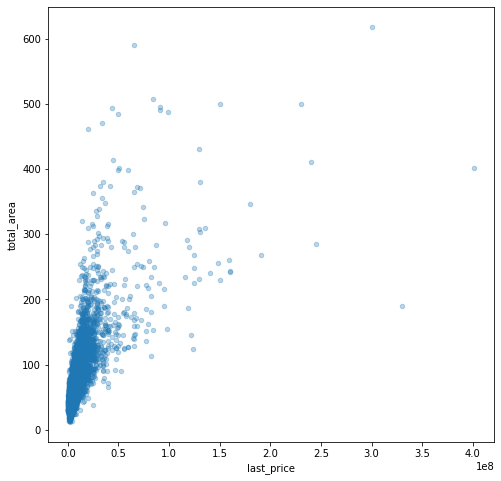

In [87]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.3, figsize=(8, 8))
#диаграмма рессеяния цены и общей площади

In [88]:
data['last_price'].corr(data['living_area'])
#корреляция цены от жилой площади

0.617397885622167

<AxesSubplot:xlabel='last_price', ylabel='living_area'>

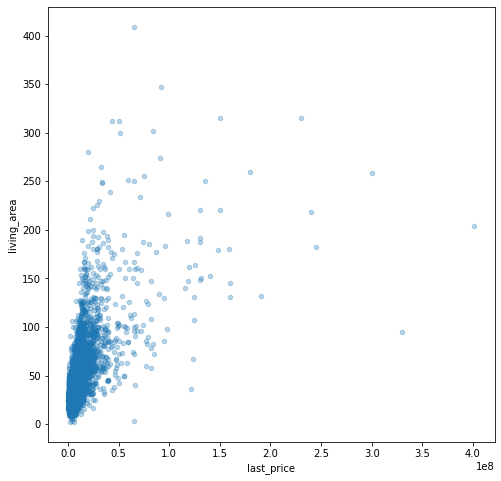

In [89]:
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.3, figsize=(8, 8))
#диаграмма рессеяния цены и жилой площади

In [90]:
data['last_price'].corr(data['kitchen_area'])
#корреляция цены от площади кухни

0.5005229722703504

<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

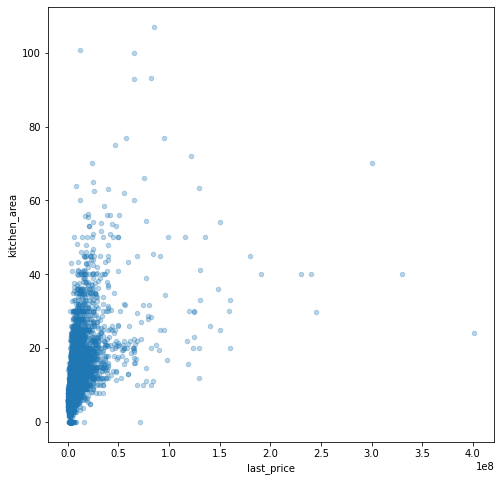

In [91]:
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.3, figsize=(8, 8))
#диаграмма рессеяния цены и площади кухни

In [92]:
data['last_price'].corr(data['rooms'])
#корреляция цены от количества комнат

0.38590110777144043

<AxesSubplot:xlabel='last_price', ylabel='rooms'>

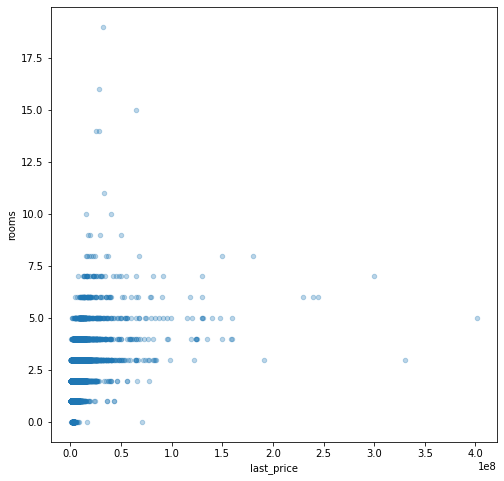

In [93]:
data.plot(x='last_price', y='rooms', kind='scatter', alpha=0.3, figsize=(8, 8))
#диаграмма рессеяния цены и количества комнат

In [94]:
data['last_price'].corr(data['floor'])
#корреляция цены от этажа

0.020211349295579082

<AxesSubplot:xlabel='last_price', ylabel='floor_type'>

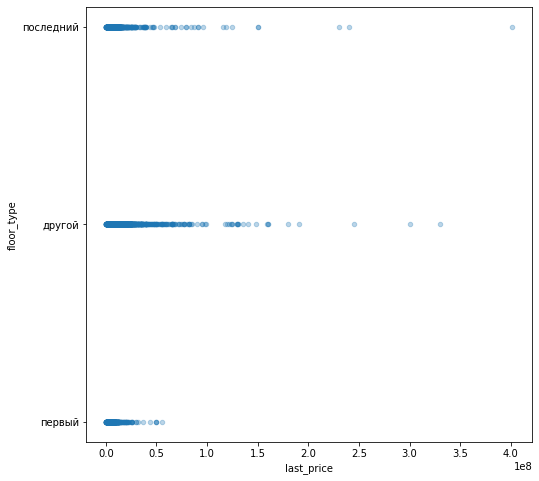

In [95]:
data.plot(x='last_price', y='floor_type', kind='scatter', alpha=0.3, figsize=(8, 8))
#диаграмма рессеяния цены и этажа

<AxesSubplot:xlabel='last_price', ylabel='weekday'>

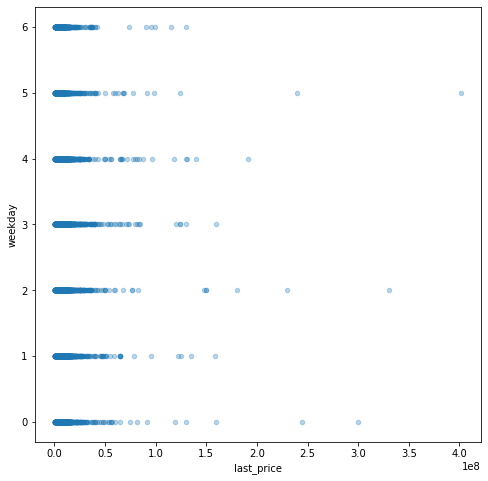

In [96]:
data.plot(x='last_price', y='weekday', kind='scatter', alpha=0.3, figsize=(8, 8))
#диаграмма рессеяния цены и дня недели публикации объявления

<AxesSubplot:xlabel='last_price', ylabel='month'>

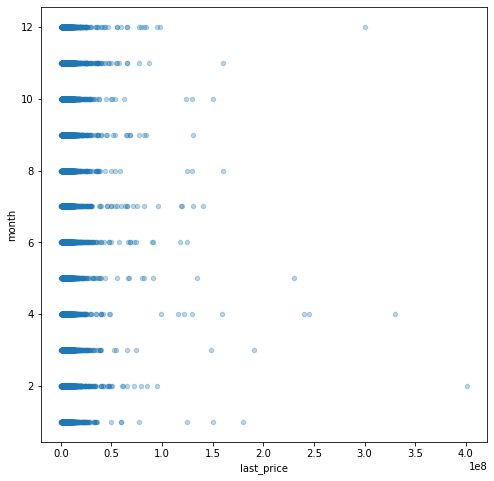

In [97]:
data.plot(x='last_price', y='month', kind='scatter', alpha=0.3, figsize=(8, 8))
#диаграмма рессеяния цены и месяца публикации объявления

<AxesSubplot:xlabel='last_price', ylabel='year'>

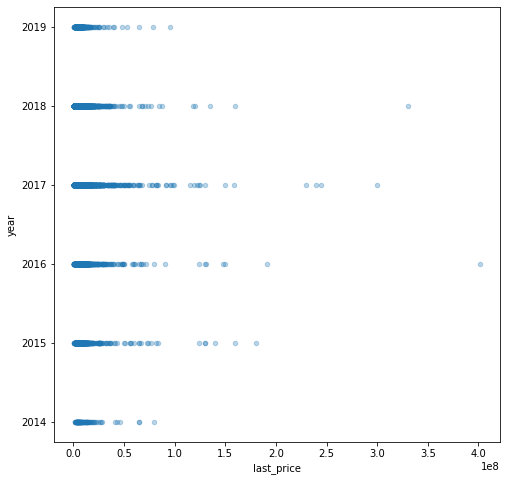

In [98]:
data.plot(x='last_price', y='year', kind='scatter', alpha=0.3, figsize=(8, 8))
#диаграмма рессеяния цены и года публикации объявления

In [99]:
data['year'].value_counts()
#количетсво объявлений в каждом году

2017    7882
2018    7521
2016    2678
2015    1092
2019    1082
2014     111
Name: year, dtype: int64

In [100]:
data.pivot_table(index='year', values='last_price', aggfunc='median')

,last_price
year,
2014,6800000
2015,5200000
2016,4500000
2017,4500000
2018,4499000
2019,4789750


По данным графикам и значениям корреляции можно сделать вывод о том, что день недели и месяц не сильно влияют на стоимость квартры. Год публикации имеет более сильное влияние, однако это может быть связано с недостатком данных в 2014 и 2019 годах, хотя стоимость росла. Думаю, в связи с потенциалом экономики к инфляции справедливо будет предпологать, что стоиость квартир должна расти из года в год. Это так же подтверждает сводная тадлица, начиная с 2016 года действительно росла медианая стоимость квартир, 2014 и 2015 года могут быть не совсем объективны из-за меньшего количества объявлений, а может тогда квартиры действительно стоили дороже.

Однако больше стоимость квартир зависит от их площади, жилой площади и площади кухни в порядке убывания. Можно предположить что это одни из главных факторов, который влияет на ценообразование квартиры в пределах одного населённого пункта, думаю это ещё и одни из главных параметров, на которые смотрят покупатели. По графикам это хорошо видно, чем больше площадь, тем дальше в право, к более высокой стоимости уходит график. Стоит отметить, что количество комнат в квартире тоже влияют на стоимость, однако, однако больше не значит дороже, начиная с квартир студий до 5-ти комнатных квартир цена стабильно растёт, а вот дальше она начинает падать, возможно такие квартиры не столь востребованы на рынке, да и встречаются они редко, а может находяться на первом этаже. Ведь тип этажа так же влияет на конечную стоимость, на первом этаже самые дешёвые квартиры, чуть дороже на последнем и, дороже всех квартиры между ними. Можно предположить и, в целом судить по опыту, что на первом этаже неудобно жить и там могут возникнуть определённые неудобства, график и рынок это подтверждают.

#### Теперь посмотрим на стоимость квадратного метра в разных населённых пунктах.

In [101]:
local_sq_m_price = data.pivot_table(index='locality_name', values='sq_m_price', aggfunc=['count' ,'mean', 'median'])
local_sq_m_price.columns = ['total_abs', 'mean_price', 'median_price']
local_sq_m_price.sort_values('mean_price', ascending=False).head(10)
#топ 10 средней стоимости среди населённых пунктов

,total_abs,mean_price,median_price
locality_name,,,
Санкт-Петербург,13561,112232.502875,103076.923077
Зеленогорск,21,111332.344382,100000.000000
Пушкин,306,102073.653442,97882.115643
Сестрорецк,162,101447.632198,98364.164501
поселок Лисий Нос,3,100660.814239,74525.745257
Кудрово,139,98337.045056,98571.428571
поселок Левашово,1,96997.690531,96997.690531
деревня Мистолово,9,96157.152893,90229.885057
деревня Кудрово,299,92473.547576,91860.465116


In [102]:
local_sq_m_price['locality_name'] = local_sq_m_price.index
local_sq_m_price

,total_abs,mean_price,median_price,locality_name
locality_name,,,,
Бокситогорск,14,17146.368775,16792.929293,Бокситогорск
Волосово,31,40242.111796,40000.000000,Волосово
Волхов,85,34883.232217,34545.454545,Волхов
Всеволожск,339,68570.615292,65789.473684,Всеволожск
Выборг,206,57184.099136,57164.842681,Выборг
...,...,...,...,...
село Путилово,2,39921.758208,39921.758208,село Путилово
село Рождествено,2,34553.884000,34553.884000,село Рождествено
село Русско-Высоцкое,8,52759.370353,51540.572845,село Русско-Высоцкое


In [103]:
local_sq_m_price.sort_values('median_price', ascending=False).head(10)
#топ 10 медианой стоимости среди населённых пунктов

,total_abs,mean_price,median_price,locality_name
locality_name,,,,
Санкт-Петербург,13561,112232.502875,103076.923077,Санкт-Петербург
Зеленогорск,21,111332.344382,100000.000000,Зеленогорск
Кудрово,139,98337.045056,98571.428571,Кудрово
Сестрорецк,162,101447.632198,98364.164501,Сестрорецк
Пушкин,306,102073.653442,97882.115643,Пушкин
поселок Левашово,1,96997.690531,96997.690531,поселок Левашово
деревня Кудрово,299,92473.547576,91860.465116,деревня Кудрово
поселок Парголово,302,89505.043917,91387.362637,поселок Парголово
деревня Мистолово,9,96157.152893,90229.885057,деревня Мистолово


In [104]:
local_sq_m_price.sort_values('total_abs', ascending=False).head(10)
#топ 10 количества объявлений среди населённых пунктов

,total_abs,mean_price,median_price,locality_name
locality_name,,,,
Санкт-Петербург,13561,112232.502875,103076.923077,Санкт-Петербург
поселок Мурино,547,85691.011789,86111.111111,поселок Мурино
поселок Шушары,407,77872.600324,76125.000000,поселок Шушары
Всеволожск,339,68570.615292,65789.473684,Всеволожск
Колпино,308,74865.364347,74005.089610,Колпино
Пушкин,306,102073.653442,97882.115643,Пушкин
поселок Парголово,302,89505.043917,91387.362637,поселок Парголово
деревня Кудрово,299,92473.547576,91860.465116,деревня Кудрово
Гатчина,268,67928.326990,67180.706522,Гатчина


In [105]:
local_sq_m_price.sort_values('mean_price', ascending=False).head(1)

,total_abs,mean_price,median_price,locality_name
locality_name,,,,
Санкт-Петербург,13561,112232.502875,103076.923077,Санкт-Петербург


In [106]:
local_sq_m_price.sort_values('mean_price', ascending=True).head(1)

,total_abs,mean_price,median_price,locality_name
locality_name,,,,
деревня Старополье,3,11206.221198,11000.0,деревня Старополье


Ожидаемо дороже всех 1 квадратный метр стоит в Санкт-Петербурге, при том и в среднем и мединое значение. Не так сильно ему уступает Зеленогорск, всего на 1000 рублей за метр и далее по убыванию, хотя Зеленогорск не самый ближайший населённый пункт к Санкт-Петербургу. А в остальном чем дальше от СПБ, тем дешевле квадратный метр. Самая же дешёвая стоимость квадратного метра в деревне Ставрополье, всего 11206 рублей в среднем. Находиться она в 172 километрах от Санкт-Петербурга.

#### Расчитаем стоимость каждого километра от центра города.

In [107]:
km_price = data[data['locality_name'] == 'Санкт-Петербург'].pivot_table(
    index='cityCenters_nearest_km', values='last_price', aggfunc=['count', 'mean'])
km_price.columns = ['count', 'mean']
km_price

,count,mean
cityCenters_nearest_km,,
0.0,18,3.012800e+07
1.0,164,1.900463e+07
2.0,256,1.765297e+07
3.0,275,1.038257e+07
4.0,575,1.192172e+07
5.0,773,1.378593e+07
6.0,522,1.485618e+07
7.0,348,1.387810e+07
8.0,512,8.605423e+06


In [108]:
km_price['mean_km_price'] = km_price['mean'] - km_price['mean'].shift(1)
km_price['mean_km_price'].mean()

-897034.6206896552

Как можно судить по таблице, с каждым дополнительным километром удаления от центра города цена уменьшается, при этом резкие скачки есть только между центром и 1 км от него и 7 и 8 километром от центра, в остальном стоимость снижаеться плавно, о чём и говорит среднее снижение стоимости в 897000 рублей с каждым км от центра города. Можно сказать что удалённость от центра города влияет на стоимость квартиры. Как выодить числа в таблице без экспоненты не смог найти:(

### Общий вывод

Это было очень интересное исследование на базе которого можно сделать некоторые выводы. Стоимость квартир действительно зависит от многих факторов. Интересно было подтвердить данными, что стоимость объектов на первом этаже ниже в сравнении с другими этажами. Так же на стоимость сильно влияют площадь квартиры, при том общая площадь влияет сильнее, чем жилая площадь и площадь кухни. Стоимость зависит ещё и от расстояния до центра города, при этом очень сильно, каждый километр обойдётся почти в 900000 рублей. Естественно на цену влияет и сам населённый пункт, в Санкт-Петербурге ожидаемо самые дорогие квартиры, а в деревнях самые дешёвые, при том неожиданно было узнать, что в Зеленогорске квартиры сотят дороже чем, например в Пушкино, хотя расстояние от СПБ отличается у них почти в два раза. А вот остальные параметры влияют на стоимость меньше, например день недели публикации или месяц не оказывают сильного влияния на стоимость. При этом в выходные дни публикуют намного меньше объявлений, чем в будние дни. Интересная зависимость есть у срока продажи квартиры и года публикации объявления, с каждым годом квартиры продаются всё быстрее и быстрее, скорее всего это связано с упращением самого процесса продажи и появлением удобных сервисов для продажи. По всем выводам в наиболее дорогой квартире будет 5 комнат, поскольку большее количество снижает цену, находиться она будет в самом центре Санкт-Петербурга, не на первом или последнем этажах с большой общей площадью, наверное такую никто не захочет продавать)

В изначальной таблице было достаточно много пропусков и неверные значения в высоте потолков, хотя 100 метровые потолки звучит очень интересно и квартира площадью 850 метров тоже. В остальном же некоторые данные были заменены средними значения, в каких-то, например в информации о балконах пропуски означали отстутствие этих объектов в квартире. Пропуски в данных о жилой площади и площади кухни были заменены на средний показатель процента жилой площади и площади кухни от площади всей квартиры, без учёта количества комнат, поскольку разница не слишком большая, такой способ наиболее объективен и не допускает значений суммы жилой площади и кухни больше, чем площадь всего объекта. Некоторые пропуски были удалены, поскольку объективно заполнить их невозможно. А вот пропуски в расстоянии до различных объктов было решено оставить, поскольку их достаточно много, а заполнять их средними или медиаными значениями означало бы исказить данные, было бы странно увидеть в деревне расстояние до центра города скажем 15 километров.